# VU Data Mining - Exercise 5

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exercise 5-1 PCA

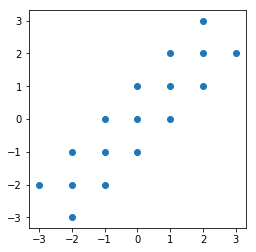

In [2]:
X = np.array([(-3, -2), (-2, -1), (-1, 0), (0, 1),
              (1, 2), (2, 3), (-2, -2), (-1, -1),
              (0, 0), (1, 1), (2, 2), (-2, -3),
              (-1, -2), (0, -1), (1, 0), (2, 1), (3, 2)])
g = plt.scatter(*X.T);
g.axes.set_aspect('equal')

### (a) Compute the covariance matrix M

In [3]:
M = np.cov(X, rowvar=False, ddof=1)
M

array([[ 3.   ,  2.625],
       [ 2.625,  3.   ]])

### (b) Compute the eigenvalues and eigenvectors of M

In [4]:
E, V = LA.eigh(M)
E

array([ 0.375,  5.625])

In [5]:
V

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

### (c) Find the smallest eigenvalue and find the related eigenvector as well. The resulted eigenvector builds the basis for the new subspace.

In [6]:
argmin = np.argmin(E)
E_min = E[argmin]
E_min

0.375

In [7]:
V_min = V[argmin]
V_min

array([-0.70710678,  0.70710678])

### (d) Transform vectors of X in this new subspace.

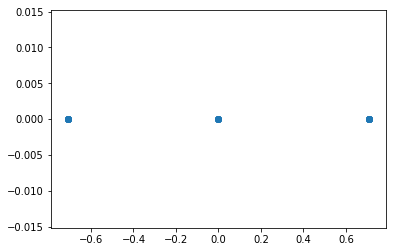

In [8]:
X_tr = X @ V_min
plt.scatter(X_tr, np.zeros(len(X_tr)));

... which is a bad representation of the original data, since one should've selected the LARGEST eigenvalue ...

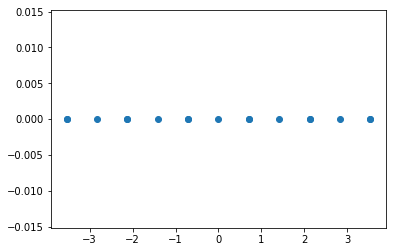

In [9]:
argmax = np.argmax(E)
E_max = E[argmax]
V_max = V[argmax]
X_pca = X @ V_max
plt.scatter(X_pca, np.zeros(len(X_pca)));

## Exercise 5-2 Applying PCA

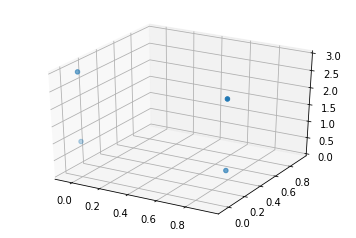

In [10]:
from mpl_toolkits.mplot3d import Axes3D
X = np.array([[1, 0, 3],
              [0, 0, 3],
              [1, 0, 1],
              [0, 0, 1]])

# 3D scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(*X.T, )

ax.set_xlim(-0.1,1)
ax.set_ylim(-0.1,1)
ax.set_zlim(0,3)

plt.show()

Points 1 and 3 may cause problems in eigenvalue decomposition, because they are linearly dependent.

In [11]:
# Calculate covariance matrix
M = np.cov(X, rowvar=False)
print('Covariance matrix:\n', M)

# Eigen decomposition
E, V = LA.eig(M)
print('Eigen values:\n', E)
print('Corresponding eigen vectors:\n', V)

Covariance matrix:
 [[ 0.33333333  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          1.33333333]]
Eigen values:
 [ 0.33333333+0.j  0.00000000+0.j  1.33333333+0.j]
Corresponding eigen vectors:
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [12]:
max_ = np.argsort(E)[2:0:-1]
E_max = E[max_]
V_max = V[max_]
print('Two largest Eigen values:\n', E_max)
print('Corresponding eigen vectors:\n', V_max)

Two largest Eigen values:
 [ 1.33333333+0.j  0.33333333+0.j]
Corresponding eigen vectors:
 [[ 0.  0.  1.]
 [ 1.  0.  0.]]


In [13]:
X_pca = X @ V_max.T
X_pca

array([[ 3.,  1.],
       [ 3.,  0.],
       [ 1.,  1.],
       [ 1.,  0.]])

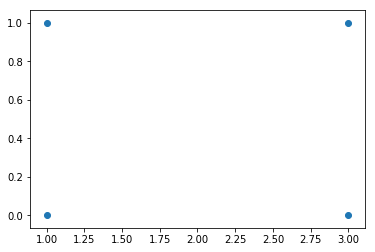

In [14]:
plt.scatter(*X_pca.T);

The two first principal components correspond to the x and z axes of the original vector space, since the contribution of the y-axis to the overall variance is zero.

SciPy's LinAlg module does not have any problems with this data set.

If it had, we could've introduced small perturbations to the input data, or added some eps to the diagonal of the covariance matrix.

In [15]:
# For comparision, sklearn's PCA based on SVD
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[ 1. ,  0.5],
       [ 1. , -0.5],
       [-1. ,  0.5],
       [-1. , -0.5]])

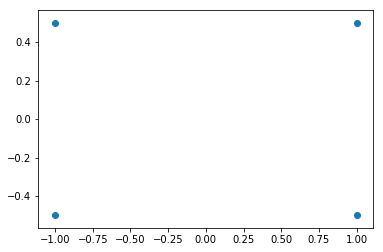

In [16]:
plt.scatter(*_.T);

## Exercise 5-3 SONAR

### (0) Data import and visualization

In [17]:
df = pd.read_csv('./runningexample.txt', sep='\t', header=None)
df.rename(columns={0 : 'x', 1 : 'y', 2 : 'class'}, inplace=True)
df.describe()

,x,y,class
count,2011.000000,2011.000000,2011.000000
mean,41.312476,48.582834,1.119344
std,21.989648,19.693304,1.255309
min,0.000000,0.000000,0.000000
25%,30.818400,33.709900,0.000000
50%,36.293700,49.558300,1.000000
75%,46.416600,63.349950,1.000000
max,100.000000,100.000000,4.000000


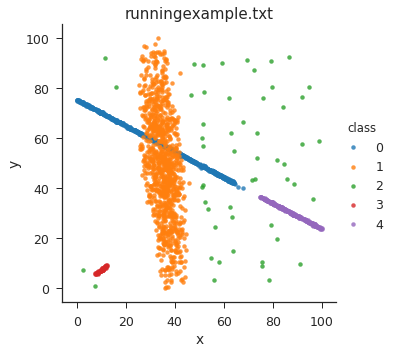

In [18]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.25)
sns.set_style("ticks")

sns.lmplot('x', 'y', data=df, fit_reg=False, hue="class",
           scatter_kws={"marker": "D", "s": 20});
plt.title('runningexample.txt');
plt.xlabel('x');
plt.ylabel('y');


### (1) Some first insights

In [19]:
X = df[['x', 'y']].values
y = df['class'].values

In [20]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type='full', max_iter=300, n_init=100, )

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [22]:
gmm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=300,
        means_init=None, n_components=5, n_init=100, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

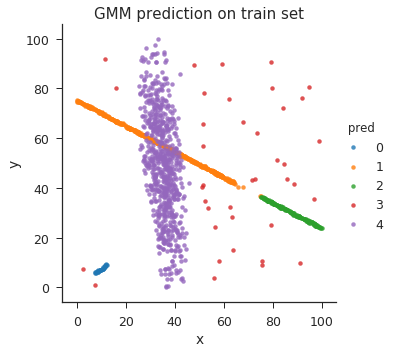

In [23]:
y_train_pred = gmm.predict(X_train)
df_train = pd.DataFrame(X_train, columns=['x', 'y'])
df_train['class'] = y_train
df_train['pred'] = y_train_pred
sns.lmplot('x', 'y', data=df_train, fit_reg=False, hue="pred",
           scatter_kws={"marker": "D", "s": 20});
plt.title('GMM prediction on train set');
plt.xlabel('x');
plt.ylabel('y');

The GMM gives very good predictions on the training data. 

Let's check whether it was overfit:

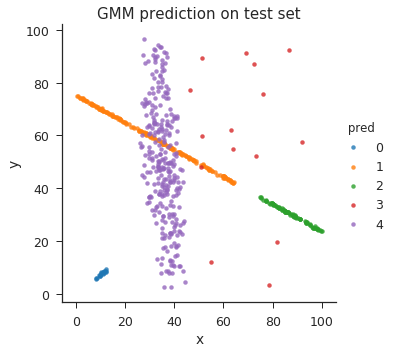

In [24]:
y_pred = gmm.predict(X_test)
df_test = pd.DataFrame(X_test, columns=['x', 'y'])
df_test['class'] = y_test
df_test['pred'] = y_pred
sns.lmplot('x', 'y', data=df_test, fit_reg=False, hue="pred",
           scatter_kws={"marker": "D", "s": 20});
plt.title('GMM prediction on test set');
plt.xlabel('x');
plt.ylabel('y');

In [25]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, v_measure_score
ami = adjusted_mutual_info_score(df_test['class'], df_test['pred'])
ari = adjusted_rand_score(df_test['class'], df_test['pred'])
v = v_measure_score(df_test['class'], df_test['pred'])
print(f'AMI = {ami:.2f}\nARI = {ari:.2f}\nV = {v:.2f}')

AMI = 0.99
ARI = 1.00
V = 0.99


Well, a Gaussian mixture model yields perfect results, given enough iterations and optimal parameterization.

If we were only interested in a good clustering, there would be no need to further continue into SONAR....

### (a) Signal collection

In [26]:
# Number of objects and attributes
n, d = X.shape

# Number of true clusters
K = np.unique(y).size

# Number of EM clusterings, i.e. GMMs
n_gmm = 100

# Number of components, randomly selected for each ping
np.random.seed(1)
n_components = np.random.choice(np.arange(1, 11), size=n_gmm, replace=True)

# Number of pings: total number of preclusters
n_pings = n_components.sum()

# Ping matrix M
M = np.empty((n_pings, n), dtype=np.float64)

# Do the preclusterings and obtain their echoes
i = 0
for model in range(n_gmm):
    k = n_components[model]
    print(f'GMM {model} with k = {k}')
    gmm = GaussianMixture(n_components=k, covariance_type='full', max_iter=3, random_state=model)
    gmm.fit(X)
    echo = gmm.predict_proba(X) * 1/n
    M[i:i+k, :] = echo.T
    i += k

GMM 0 with k = 6
GMM 1 with k = 9
GMM 2 with k = 10
GMM 3 with k = 6
GMM 4 with k = 1
GMM 5 with k = 1
GMM 6 with k = 2
GMM 7 with k = 8
GMM 8 with k = 7
GMM 9 with k = 10
GMM 10 with k = 3
GMM 11 with k = 5
GMM 12 with k = 6
GMM 13 with k = 3
GMM 14 with k = 5
GMM 15 with k = 3
GMM 16 with k = 5
GMM 17 with k = 8


/home/roman/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GMM 18 with k = 8
GMM 19 with k = 10
GMM 20 with k = 2
GMM 21 with k = 8
GMM 22 with k = 1
GMM 23 with k = 7
GMM 24 with k = 10
GMM 25 with k = 10
GMM 26 with k = 8
GMM 27 with k = 7
GMM 28 with k = 10
GMM 29 with k = 2
GMM 30 with k = 1
GMM 31 with k = 2
GMM 32 with k = 9
GMM 33 with k = 9
GMM 34 with k = 4
GMM 35 with k = 10
GMM 36 with k = 9
GMM 37 with k = 8
GMM 38 with k = 4
GMM 39 with k = 7
GMM 40 with k = 6
GMM 41 with k = 2
GMM 42 with k = 10
GMM 43 with k = 4
GMM 44 with k = 5
GMM 45 with k = 9
GMM 46 with k = 2
GMM 47 with k = 5
GMM 48 with k = 1
GMM 49 with k = 4
GMM 50 with k = 10
GMM 51 with k = 3
GMM 52 with k = 1
GMM 53 with k = 5
GMM 54 with k = 10
GMM 55 with k = 3
GMM 56 with k = 8
GMM 57 with k = 8
GMM 58 with k = 10
GMM 59 with k = 9
GMM 60 with k = 7
GMM 61 with k = 10
GMM 62 with k = 4
GMM 63 with k = 8
GMM 64 with k = 8
GMM 65 with k = 5
GMM 66 with k = 6
GMM 67 with k = 10
GMM 68 with k = 4
GMM 69 with k = 7
GMM 70 with k = 9
GMM 71 with k = 1
GMM 72 with k = 3

### (b) Independent Cluster Analysis

In [27]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
M_cent = scaler.fit_transform(M.T).T

# Ping covariance matrix
P = M_cent @ M_cent.T

# Eigen decomposition
D, E = LA.eigh(P)
l = 2
print(f'Variance explained by principal components (cumulative):')
print((np.cumsum(np.abs(D[::-1])) / np.sum(np.abs(D)))[:l])

# Select l=2 principal components
idx = -l - 1
E_l = E[:idx:-1]
D_l = D[:idx:-1]

# Inverse and sqrt of eigenvalues
D_l_tr = np.diag(1. / np.sqrt(D_l))

# Whitening matrix
X_white = D_l_tr @ E_l @ M_cent

# FastICA
from sklearn.decomposition import FastICA
fastica = FastICA(whiten=False, random_state=6)
X_sonar1 = fastica.fit_transform(X_white.T)

Variance explained by principal components (cumulative):
[ 0.19021844  0.35925566]


In [28]:
# Alternatively, adapted from sklearn's whitening
u, d, _ = LA.svd(M_cent, full_matrices=False)
del _

# Selecting the first two principal components
l = 2
K = (u / d).T[:l]  # see (6.33) p.140
del u, d
X_white = K @ M_cent
# see (13.6) p.267 Here X1 is white and data
# in X has been projected onto a subspace by PCA
X_white *= np.sqrt(M.shape[1])
fastica = FastICA(whiten=False, random_state=6)
X_sonar2 = fastica.fit_transform(X_white.T)

### (c) Cluster Identification

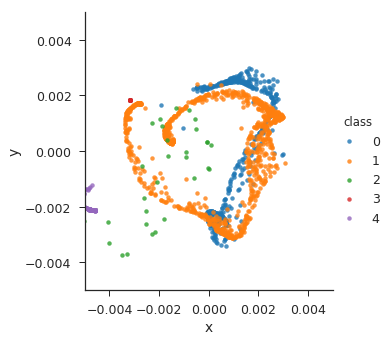

In [29]:
# Using variant 1
df_sonar1 = pd.DataFrame(X_sonar1, columns=['x', 'y'])
df_sonar1['class'] = df['class']
lm = sns.lmplot('x', 'y', data=df_sonar1, fit_reg=False, hue="class",
           scatter_kws={"marker": "D", "s": 20}, );
axes = lm.axes
axes[0, 0].set_xlim(-5e-3, 5e-3)
axes[0, 0].set_ylim(-5e-3, 5e-3);

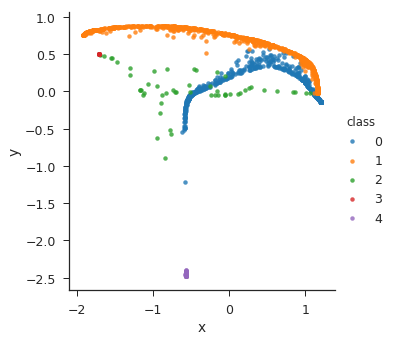

In [30]:
# Using variant 2
df_sonar2 = pd.DataFrame(X_sonar2[:, :2], columns=['x', 'y'])
df_sonar2['class'] = df['class']
sns.lmplot('x', 'y', data=df_sonar2, fit_reg=False, hue="class",
           scatter_kws={"marker": "D", "s": 20});